In [1]:
#librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import plotly.express as px
import os 
from pathlib import Path

In [2]:
#funciones para limpiar los datos 
from utils import *

# **Dataset 1: Software Engineer Salaries**

In [3]:
#Carga del dataset
df1 = pd.read_csv(r'datasets\Software Engineer Salaries.csv')
#descargarlo desde https://www.kaggle.com/datasets/emreksz/software-engineer-jobs-and-salaries-2024

In [4]:
#revision del dataset
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 870 entries, 0 to 869
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        868 non-null    object 
 1   Company Score  789 non-null    float64
 2   Job Title      870 non-null    object 
 3   Location       857 non-null    object 
 4   Date           870 non-null    object 
 5   Salary         764 non-null    object 
dtypes: float64(1), object(5)
memory usage: 40.9+ KB
None


In [5]:
# Identificar duplicados en todas las columnas
duplicados = df1.duplicated()

# Contar el número total de duplicados
print(f"Total duplicados: {duplicados.sum()}")

Total duplicados: 0


In [6]:
# Eliminar duplicados en caso de ser necesario
df1 = df1.drop_duplicates()

In [7]:
#revision previa de los datos
df1.head(5)

,Company,Company Score,Job Title,Location,Date,Salary
0,ViewSoft,4.8,Software Engineer,"Manassas, VA",8d,$68K - $94K (Glassdoor est.)
1,Workiva,4.3,Software Support Engineer,Remote,2d,$61K - $104K (Employer est.)
2,"Garmin International, Inc.",3.9,C# Software Engineer,"Cary, NC",2d,$95K - $118K (Glassdoor est.)
3,Snapchat,3.5,"Software Engineer, Fullstack, 1+ Years of Expe...","Los Angeles, CA",2d,$97K - $145K (Employer est.)
4,Vitesco Technologies Group AG,3.1,Software Engineer,"Seguin, TX",2d,$85K - $108K (Glassdoor est.)


In [8]:
#Limpiamos la columna de salarios para obtener minimo, maximo y salario promedio
df1=extraer_salarios(df1,"Salary")

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 870 entries, 0 to 869
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        868 non-null    object 
 1   Company Score  789 non-null    float64
 2   Job Title      870 non-null    object 
 3   Location       857 non-null    object 
 4   Date           870 non-null    object 
 5   Salary         764 non-null    object 
 6   min_salary     870 non-null    int64  
 7   max_salary     870 non-null    int64  
 8   avg_salary     870 non-null    float64
dtypes: float64(2), int64(2), object(5)
memory usage: 61.3+ KB


c:\Users\daine\Downloads\Proyecto\ETL_EDA\utils.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_n.index, x=top_n.values, palette='viridis')
c:\Users\daine\Downloads\Proyecto\ETL_EDA\utils.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(top_n.index, rotation=0, ha='right')


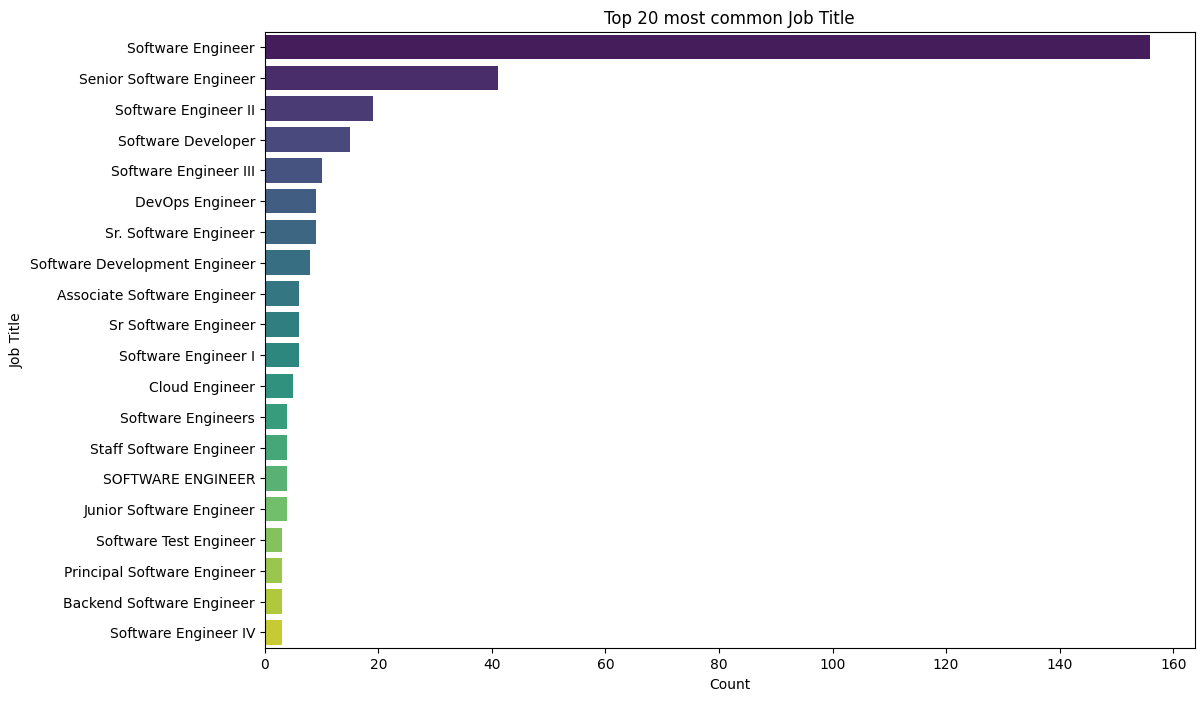

c:\Users\daine\Downloads\Proyecto\ETL_EDA\utils.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_n.index, x=top_n.values, palette='viridis')
c:\Users\daine\Downloads\Proyecto\ETL_EDA\utils.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(top_n.index, rotation=0, ha='right')


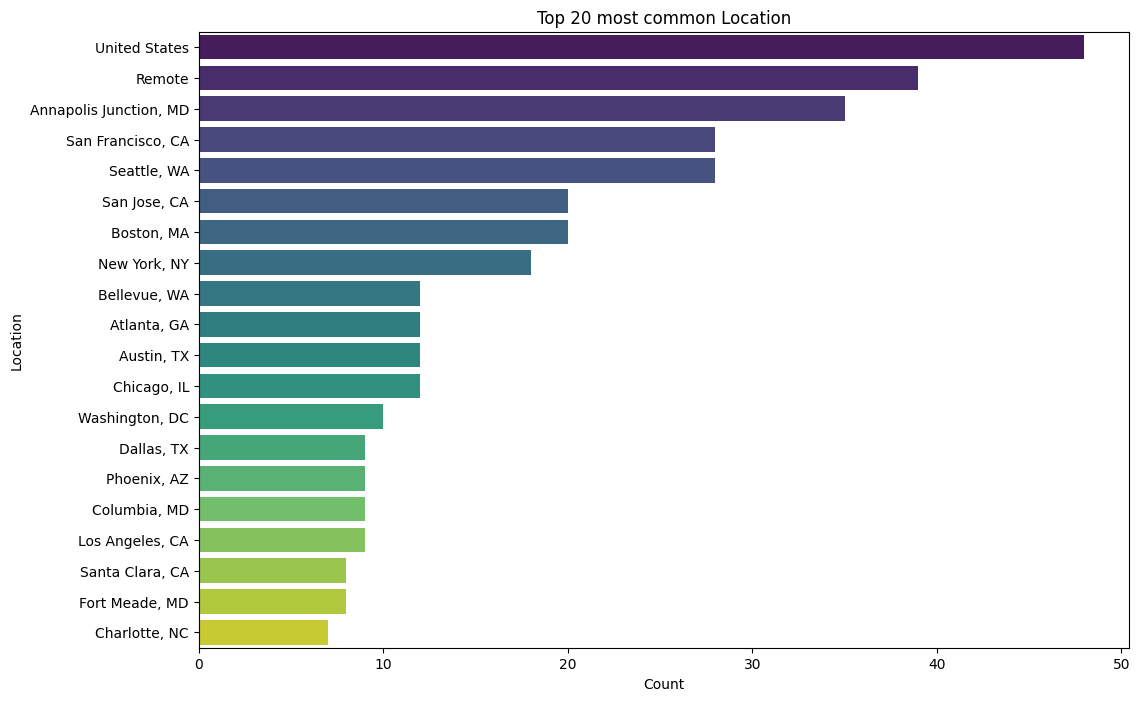

c:\Users\daine\Downloads\Proyecto\ETL_EDA\utils.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_n.index, x=top_n.values, palette='viridis')
c:\Users\daine\Downloads\Proyecto\ETL_EDA\utils.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(top_n.index, rotation=0, ha='right')


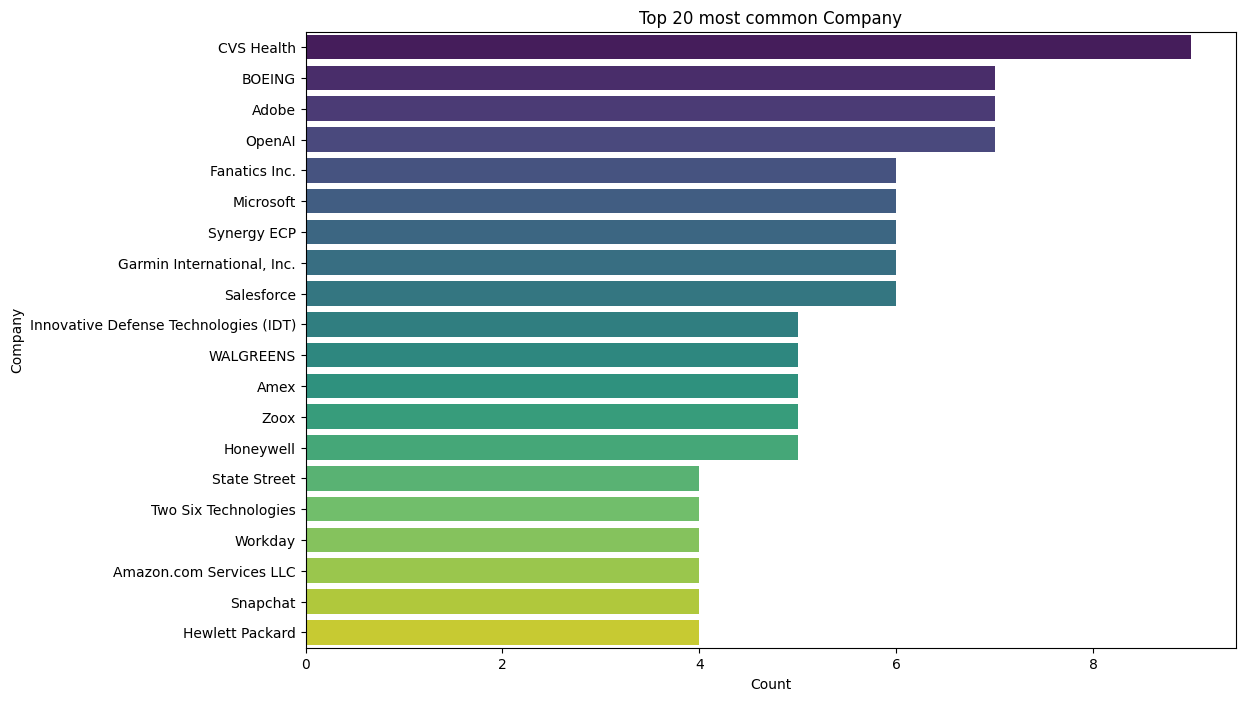

In [10]:
#revisamos las variables categoricas
categorical_columns = ['Job Title', 'Location','Company']
for col in categorical_columns:
    plot_top_n_categories(df1, col, n=20)

In [11]:
#Agupamos los titulos de empleo
df1['job_simp'] = df1['Job Title'].apply(title_simplifier)
df1.job_simp.value_counts()

job_simp
software engineer                                       638
software developer                                       16
devops engineer                                           9
software development engineer                             8
machine learning engineer                                 8
                                                       ... 
software systems engineer/devops engineer                 1
wordpress full stack engineer (react)                     1
c# software developer                                     1
software certification engineer 1 - software quality      1
software & system dev. sr. engineer                       1
Name: count, Length: 170, dtype: int64

# **Dataset 2: Data Science Job listing**

In [12]:
#Carga del dataset
df2 = pd.read_csv(r'datasets/Data-Science-Job_Listing_completed.csv')
#descargarlo desde https://www.kaggle.com/datasets/ritiksharma07/data-science-job-listings-from-glassdoor

In [13]:
#revision del dataset
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Position           500 non-null    int64  
 1   Job Title          500 non-null    object 
 2   Company Name       500 non-null    object 
 3   Location           500 non-null    object 
 4   Salary             438 non-null    object 
 5   Date               500 non-null    object 
 6   Logo               436 non-null    object 
 7   Job Link           500 non-null    object 
 8   Company Rating     439 non-null    float64
 9   Status             500 non-null    int64  
 10  Job Description    481 non-null    object 
 11  Size               432 non-null    object 
 12  Founded            432 non-null    object 
 13  Type of ownership  432 non-null    object 
 14  Industry           432 non-null    object 
 15  Sector             432 non-null    object 
 16  Revenue            432 non

In [14]:
df2.head(5)

,Position,Job Title,Company Name,Location,Salary,Date,Logo,Job Link,Company Rating,Status,Job Description,Size,Founded,Type of ownership,Industry,Sector,Revenue
0,1,Associate Stop Loss Underwriter,The Insurance Center\n2.7,"Onalaska, WI",$57K - $84K (Glassdoor est.),30d+,https://media.glassdoor.com/sql/453835/the-ins...,https://www.glassdoor.com/partner/jobListing.h...,2.7,1,The Associate Stop Loss Underwriter is respons...,De 51 a 200 empleados,1966,Empresa - pública,Aseguradoras y sociedades de inversión,Seguros,Desconocido/no corresponde
1,2,Manager of Data Science,"Nuvative, Inc.\n3.4","Wichita, KS",$106K - $157K (Glassdoor est.),30d+,https://media.glassdoor.com/sql/1384674/net-pa...,https://www.glassdoor.com/partner/jobListing.h...,3.4,1,Job Description\nDEPARTMENT\n: Analytics\nJOB\...,De 1 a 50 empleados,2007,Empresa - privada,Banca y Servicios de crédito,Finanzas,De $5 a $25 millones (USD)
2,3,Senior Data Product Manager,ProviderTrust\n4.2,"Nashville, TN",$105K - $141K (Glassdoor est.),11d,https://media.glassdoor.com/sql/1953857/hibob-...,https://www.glassdoor.com/partner/jobListing.h...,4.2,1,ProviderTrust Summary\nProviderTrust was found...,De 501 a 1000 empleados,2015,Empresa - privada,Desarrollo de software,Tecnologías de la información,Desconocido/no corresponde
3,4,Oncology Nurse Navigator,Inizio Engage\n3.6,"Portland, OR",$90K - $113K (Employer est.),1d,https://media.glassdoor.com/sql/8794153/inizio...,https://www.glassdoor.com/partner/jobListing.h...,3.6,1,Cell Therapy Navigators (Oncology Nurse Naviga...,De 5001 a 10 000 empleados,2022,Empresa - privada,--,--,Desconocido/no corresponde
4,5,Head of Artificial Intelligence – Americas Region,Covestro\n3.6,"Pittsburgh, PA",$89K - $148K (Glassdoor est.),30d+,https://media.glassdoor.com/sql/27128/covestro...,https://www.glassdoor.com/partner/jobListing.h...,3.6,1,We are Covestro. We are curious. We are courag...,Más de 10 000 empleados,2015,Empresa - pública,Fabricación de productos químicos,Manufactura,Más de $10 000 millones (USD)


In [15]:
#eliminamos la columna position
df2 = df2.drop(['Position','Status','Logo'], axis=1)

In [16]:
# Identificar duplicados en todas las columnas
duplicados = df2.duplicated()

# Contar el número total de duplicados
print(f"Total duplicados: {duplicados.sum()}")

Total duplicados: 0


In [17]:
#Eliminar duplicamos en caso de ser necesario
df2 = df2.drop_duplicates()

In [18]:
#Obtenemos los montos de salario
df2=extraer_salarios(df2,"Salary")

In [19]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          500 non-null    object 
 1   Company Name       500 non-null    object 
 2   Location           500 non-null    object 
 3   Salary             438 non-null    object 
 4   Date               500 non-null    object 
 5   Job Link           500 non-null    object 
 6   Company Rating     439 non-null    float64
 7   Job Description    481 non-null    object 
 8   Size               432 non-null    object 
 9   Founded            432 non-null    object 
 10  Type of ownership  432 non-null    object 
 11  Industry           432 non-null    object 
 12  Sector             432 non-null    object 
 13  Revenue            432 non-null    object 
 14  min_salary         500 non-null    int64  
 15  max_salary         500 non-null    int64  
 16  avg_salary         500 non

c:\Users\daine\Downloads\Proyecto\ETL_EDA\utils.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_n.index, x=top_n.values, palette='viridis')
c:\Users\daine\Downloads\Proyecto\ETL_EDA\utils.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(top_n.index, rotation=0, ha='right')


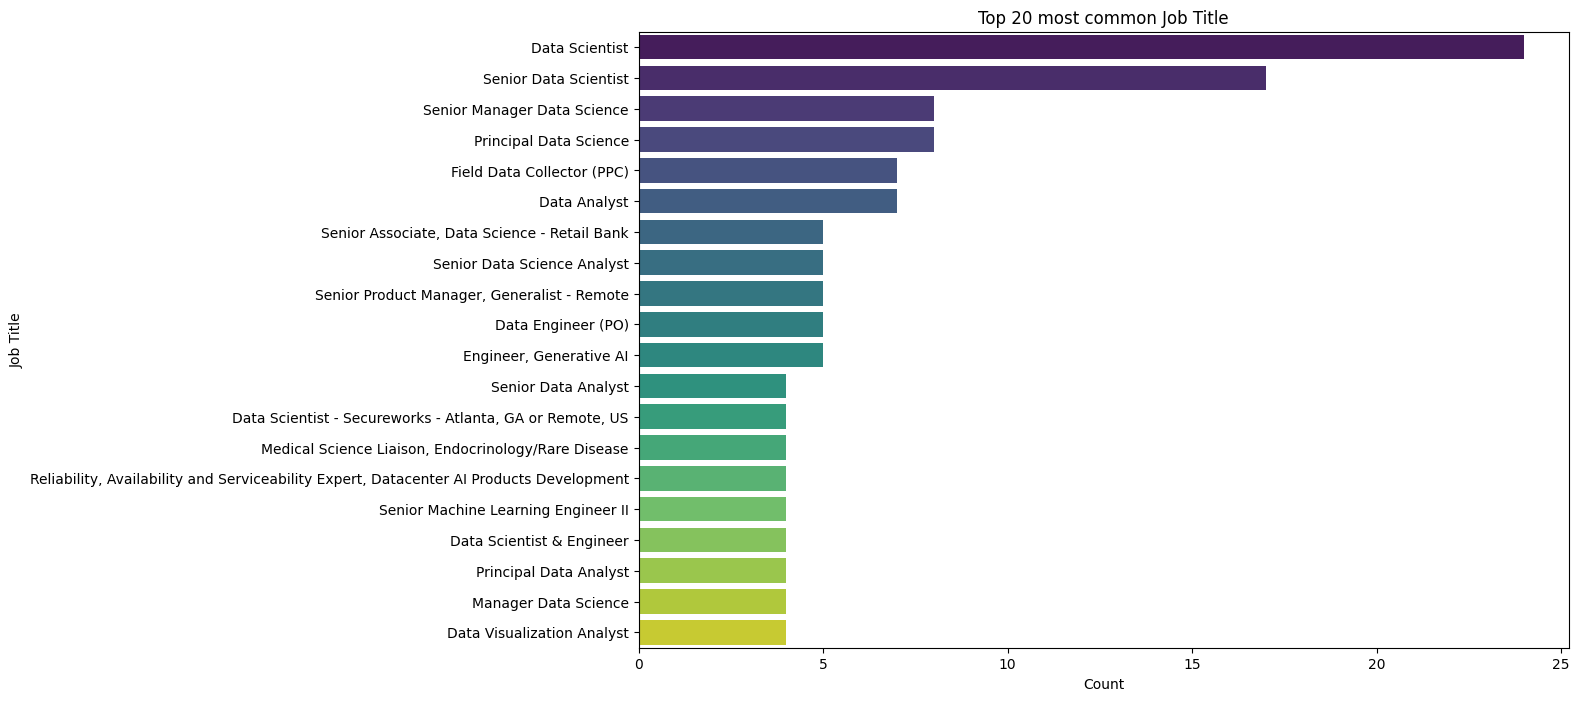

c:\Users\daine\Downloads\Proyecto\ETL_EDA\utils.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_n.index, x=top_n.values, palette='viridis')
c:\Users\daine\Downloads\Proyecto\ETL_EDA\utils.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(top_n.index, rotation=0, ha='right')


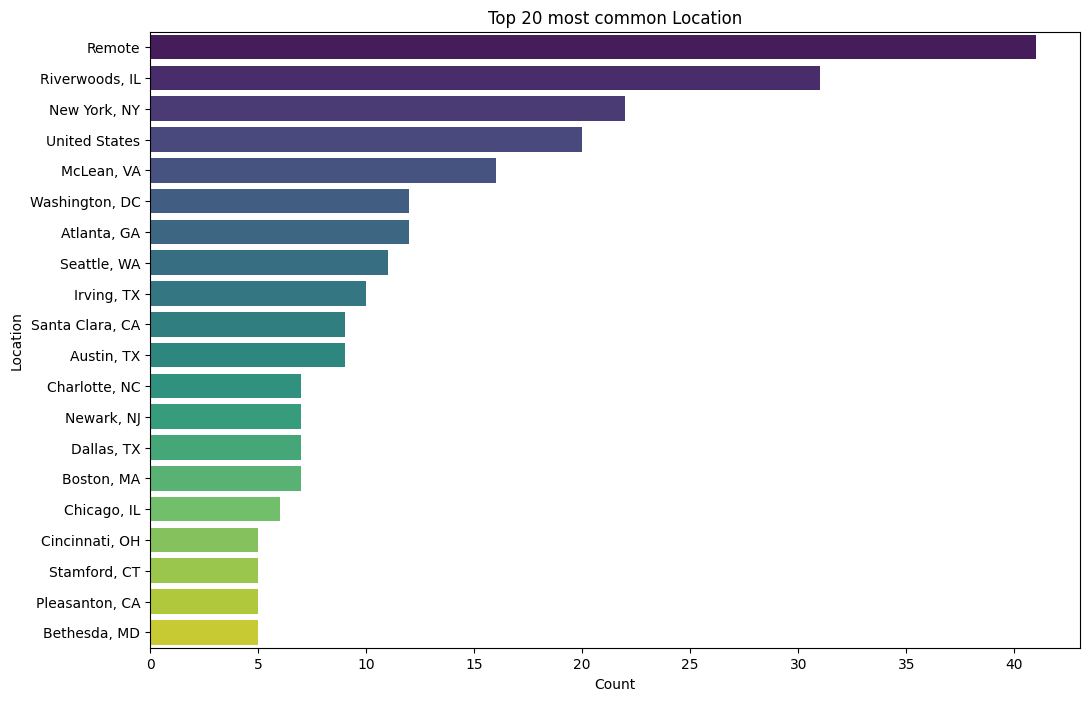

In [20]:
#reviso las columnas categoricas
categorical_columns = ['Job Title', 'Location']
for col in categorical_columns:
    plot_top_n_categories(df2, col, n=20)

In [21]:
#Agrupamos los titulos de empleo
df2['job_simp'] = df2['Job Title'].apply(title_simplifier)
df2.job_simp.value_counts()

job_simp
data scientist                                                                            95
data analyst                                                                              82
manager                                                                                   57
director                                                                                  25
data engineer                                                                             21
                                                                                          ..
bilingual (english/spanish) ai engineer                                                    1
analytical flavor chemist                                                                  1
cell therapy navigators                                                                    1
front desk/mail clerk                                                                      1
tchr of english- newark school of data science and informatio

In [22]:
#Limpiamos la columna de la compañia
def clean_company_name(name):
    # Usamos una expresión regular para eliminar todo lo que sigue después del nombre
    return re.sub(r'\d+(\.\d+)?$', '', name).strip()

# Aplicamos la función a la columna 'company'
df2['Company Name'] = df2['Company Name'].apply(clean_company_name)

In [23]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          500 non-null    object 
 1   Company Name       500 non-null    object 
 2   Location           500 non-null    object 
 3   Salary             438 non-null    object 
 4   Date               500 non-null    object 
 5   Job Link           500 non-null    object 
 6   Company Rating     439 non-null    float64
 7   Job Description    481 non-null    object 
 8   Size               432 non-null    object 
 9   Founded            432 non-null    object 
 10  Type of ownership  432 non-null    object 
 11  Industry           432 non-null    object 
 12  Sector             432 non-null    object 
 13  Revenue            432 non-null    object 
 14  min_salary         500 non-null    int64  
 15  max_salary         500 non-null    int64  
 16  avg_salary         500 non

In [24]:
df2.head()

,Job Title,Company Name,Location,Salary,Date,Job Link,Company Rating,Job Description,Size,Founded,Type of ownership,Industry,Sector,Revenue,min_salary,max_salary,avg_salary,job_simp
0,Associate Stop Loss Underwriter,The Insurance Center,"Onalaska, WI",$57K - $84K (Glassdoor est.),30d+,https://www.glassdoor.com/partner/jobListing.h...,2.7,The Associate Stop Loss Underwriter is respons...,De 51 a 200 empleados,1966,Empresa - pública,Aseguradoras y sociedades de inversión,Seguros,Desconocido/no corresponde,57000,84000,70500.0,associate stop loss underwriter
1,Manager of Data Science,"Nuvative, Inc.","Wichita, KS",$106K - $157K (Glassdoor est.),30d+,https://www.glassdoor.com/partner/jobListing.h...,3.4,Job Description\nDEPARTMENT\n: Analytics\nJOB\...,De 1 a 50 empleados,2007,Empresa - privada,Banca y Servicios de crédito,Finanzas,De $5 a $25 millones (USD),106000,157000,131500.0,manager
2,Senior Data Product Manager,ProviderTrust,"Nashville, TN",$105K - $141K (Glassdoor est.),11d,https://www.glassdoor.com/partner/jobListing.h...,4.2,ProviderTrust Summary\nProviderTrust was found...,De 501 a 1000 empleados,2015,Empresa - privada,Desarrollo de software,Tecnologías de la información,Desconocido/no corresponde,105000,141000,123000.0,manager
3,Oncology Nurse Navigator,Inizio Engage,"Portland, OR",$90K - $113K (Employer est.),1d,https://www.glassdoor.com/partner/jobListing.h...,3.6,Cell Therapy Navigators (Oncology Nurse Naviga...,De 5001 a 10 000 empleados,2022,Empresa - privada,--,--,Desconocido/no corresponde,90000,113000,101500.0,oncology nurse navigator
4,Head of Artificial Intelligence – Americas Region,Covestro,"Pittsburgh, PA",$89K - $148K (Glassdoor est.),30d+,https://www.glassdoor.com/partner/jobListing.h...,3.6,We are Covestro. We are curious. We are courag...,Más de 10 000 empleados,2015,Empresa - pública,Fabricación de productos químicos,Manufactura,Más de $10 000 millones (USD),89000,148000,118500.0,head of artificial intelligence – americas region


In [25]:
# Aplicar la función al DataFrame
df2['key_info'] = df2['Job Description'].apply(extract_key_info)

# Descomponer la columna de información clave en columnas separadas
df2['skills'] = df2['key_info'].apply(lambda x: x['skills'])
df2['responsibilities'] = df2['key_info'].apply(lambda x: x['responsibilities'])
df2['requirements'] = df2['key_info'].apply(lambda x: x['requirements'])

# Eliminar la columna temporal
df2= df2.drop(columns=['key_info'])

# Aplicar la limpieza a la columna de skills
df2['cleaned_skills'] = df2['skills'].apply(clean_skills)

In [26]:
df2.head(5)

,Job Title,Company Name,Location,Salary,Date,Job Link,Company Rating,Job Description,Size,Founded,...,Sector,Revenue,min_salary,max_salary,avg_salary,job_simp,skills,responsibilities,requirements,cleaned_skills
0,Associate Stop Loss Underwriter,The Insurance Center,"Onalaska, WI",$57K - $84K (Glassdoor est.),30d+,https://www.glassdoor.com/partner/jobListing.h...,2.7,The Associate Stop Loss Underwriter is respons...,De 51 a 200 empleados,1966,...,Seguros,Desconocido/no corresponde,57000,84000,70500.0,associate stop loss underwriter,"[Qualifications and Skills, Minimum of an asso...","[Responsibilities and Duties, Key Responsibili...",[],
1,Manager of Data Science,"Nuvative, Inc.","Wichita, KS",$106K - $157K (Glassdoor est.),30d+,https://www.glassdoor.com/partner/jobListing.h...,3.4,Job Description\nDEPARTMENT\n: Analytics\nJOB\...,De 1 a 50 empleados,2007,...,Finanzas,De $5 a $25 millones (USD),106000,157000,131500.0,manager,[],[],[],
2,Senior Data Product Manager,ProviderTrust,"Nashville, TN",$105K - $141K (Glassdoor est.),11d,https://www.glassdoor.com/partner/jobListing.h...,4.2,ProviderTrust Summary\nProviderTrust was found...,De 501 a 1000 empleados,2015,...,Tecnologías de la información,Desconocido/no corresponde,105000,141000,123000.0,manager,"[: Expertise in defining, scoping, and automat...",[],"[Required skills and qualifications, Experienc...",
3,Oncology Nurse Navigator,Inizio Engage,"Portland, OR",$90K - $113K (Employer est.),1d,https://www.glassdoor.com/partner/jobListing.h...,3.6,Cell Therapy Navigators (Oncology Nurse Naviga...,De 5001 a 10 000 empleados,2022,...,--,Desconocido/no corresponde,90000,113000,101500.0,oncology nurse navigator,[],[],"[Bachelor's (Required), Experience:, Nursing: ...",
4,Head of Artificial Intelligence – Americas Region,Covestro,"Pittsburgh, PA",$89K - $148K (Glassdoor est.),30d+,https://www.glassdoor.com/partner/jobListing.h...,3.6,We are Covestro. We are curious. We are courag...,Más de 10 000 empleados,2015,...,Manufactura,Más de $10 000 millones (USD),89000,148000,118500.0,head of artificial intelligence – americas region,"[Knowledge and Skills, Experience in developin...","[Major Tasks and Responsibilities, Accountable...",[],


# **Dataset 3: Glassdoor Salary Cleaned Version**

In [27]:
#Carga del dataset
df3 = pd.read_csv(r'datasets\Glassdoor_Salary_Cleaned_Version.csv')
#descargarlo desde https://www.kaggle.com/datasets/fahadrehman07/data-science-jobs-and-salary-glassdoor/data

In [28]:
#revision del dataset
print(df3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          742 non-null    object 
 1   Salary Estimate    742 non-null    object 
 2   Job Description    742 non-null    object 
 3   Rating             742 non-null    float64
 4   Company Name       742 non-null    object 
 5   Location           742 non-null    object 
 6   Headquarters       742 non-null    object 
 7   Size               742 non-null    object 
 8   Founded            742 non-null    int64  
 9   Type of ownership  742 non-null    object 
 10  Industry           742 non-null    object 
 11  Sector             742 non-null    object 
 12  Revenue            742 non-null    object 
 13  Competitors        742 non-null    object 
 14  hourly             742 non-null    int64  
 15  employer_provided  742 non-null    int64  
 16  min_salary         742 non

In [29]:
# Identificar duplicados en todas las columnas
duplicados = df3.duplicated()

# Contar el número total de duplicados
print(f"Total duplicados: {duplicados.sum()}")

Total duplicados: 275


In [30]:
df3.head(5)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,avg_salary,company_txt,job_state,same_state,age,python_yn,R_yn,spark,aws,excel
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,72.0,Tecolote Research\n,NM,0,47,1,0,0,0,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,87.5,University of Maryland Medical System\n,MD,0,36,1,0,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,85.0,KnowBe4\n,FL,1,10,1,0,1,0,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,76.5,PNNL\n,WA,1,55,1,0,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,114.5,Affinity Solutions\n,NY,1,22,1,0,0,0,1


In [31]:
#descartamos las columnas que no vamos a utilizar
df3 = df3.drop(['min_salary', 'max_salary','avg_salary','company_txt','age','python_yn','R_yn','spark','aws','excel'], axis=1)

In [32]:
# Identificar duplicados en todas las columnas
duplicados = df3.duplicated()

# Contar el número total de duplicados
print(f"Total duplicados: {duplicados.sum()}")

Total duplicados: 275


In [33]:
#descartamos los duplicados
df3 = df3.drop_duplicates()

In [34]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 467 entries, 0 to 735
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          467 non-null    object 
 1   Salary Estimate    467 non-null    object 
 2   Job Description    467 non-null    object 
 3   Rating             467 non-null    float64
 4   Company Name       467 non-null    object 
 5   Location           467 non-null    object 
 6   Headquarters       467 non-null    object 
 7   Size               467 non-null    object 
 8   Founded            467 non-null    int64  
 9   Type of ownership  467 non-null    object 
 10  Industry           467 non-null    object 
 11  Sector             467 non-null    object 
 12  Revenue            467 non-null    object 
 13  Competitors        467 non-null    object 
 14  hourly             467 non-null    int64  
 15  employer_provided  467 non-null    int64  
 16  job_state          467 non-null

In [35]:
#obtenemos los salarios (minimo, maximo, promedio)
df3=extraer_salarios(df3,"Salary Estimate")

In [36]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 467 entries, 0 to 735
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          467 non-null    object 
 1   Salary Estimate    467 non-null    object 
 2   Job Description    467 non-null    object 
 3   Rating             467 non-null    float64
 4   Company Name       467 non-null    object 
 5   Location           467 non-null    object 
 6   Headquarters       467 non-null    object 
 7   Size               467 non-null    object 
 8   Founded            467 non-null    int64  
 9   Type of ownership  467 non-null    object 
 10  Industry           467 non-null    object 
 11  Sector             467 non-null    object 
 12  Revenue            467 non-null    object 
 13  Competitors        467 non-null    object 
 14  hourly             467 non-null    int64  
 15  employer_provided  467 non-null    int64  
 16  job_state          467 non-null

c:\Users\daine\Downloads\Proyecto\ETL_EDA\utils.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_n.index, x=top_n.values, palette='viridis')
c:\Users\daine\Downloads\Proyecto\ETL_EDA\utils.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(top_n.index, rotation=0, ha='right')


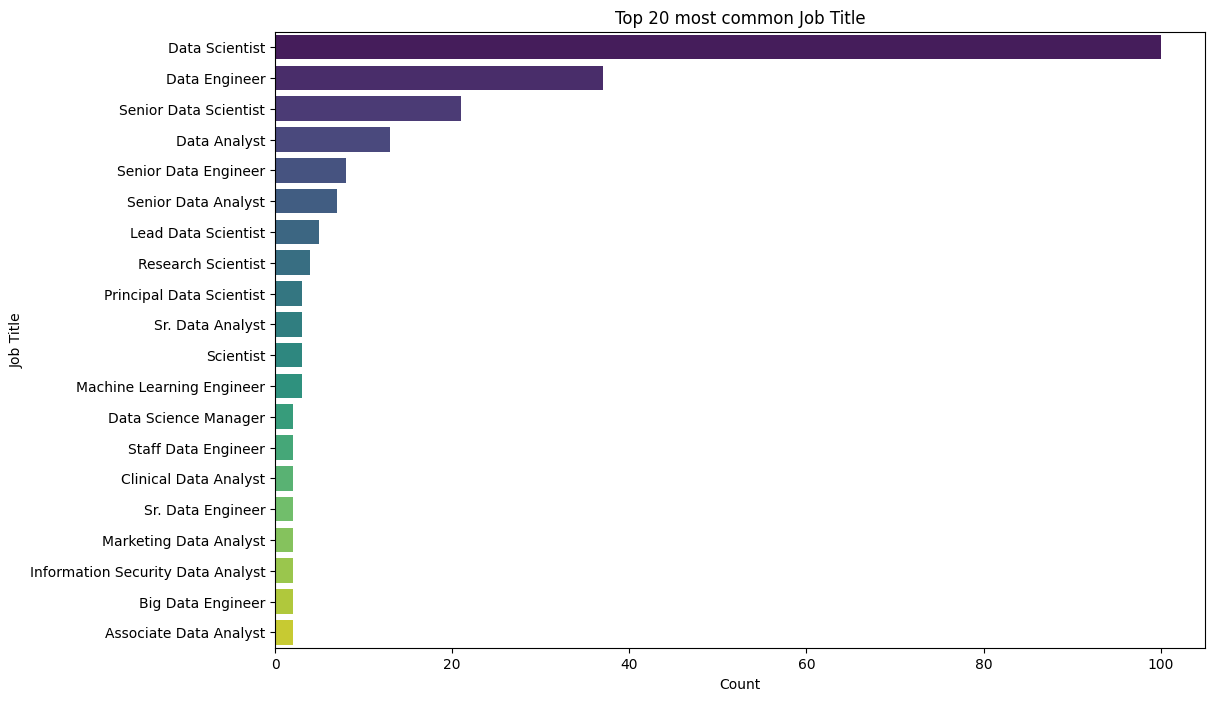

c:\Users\daine\Downloads\Proyecto\ETL_EDA\utils.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_n.index, x=top_n.values, palette='viridis')
c:\Users\daine\Downloads\Proyecto\ETL_EDA\utils.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(top_n.index, rotation=0, ha='right')


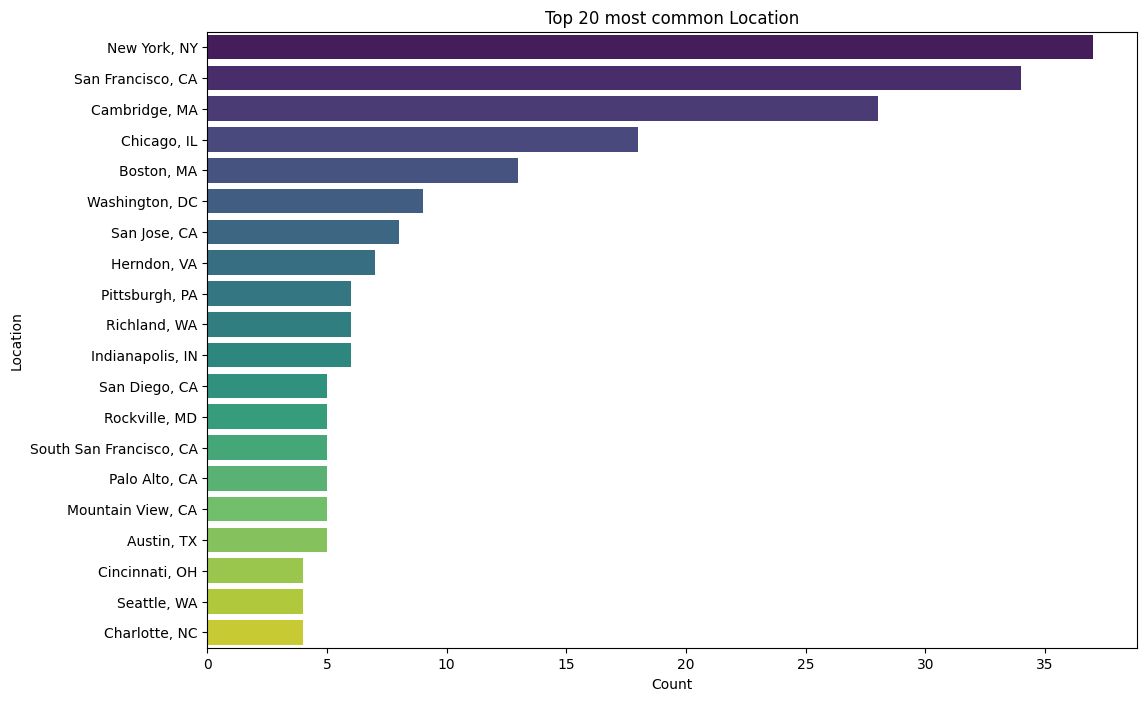

c:\Users\daine\Downloads\Proyecto\ETL_EDA\utils.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_n.index, x=top_n.values, palette='viridis')
c:\Users\daine\Downloads\Proyecto\ETL_EDA\utils.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(top_n.index, rotation=0, ha='right')


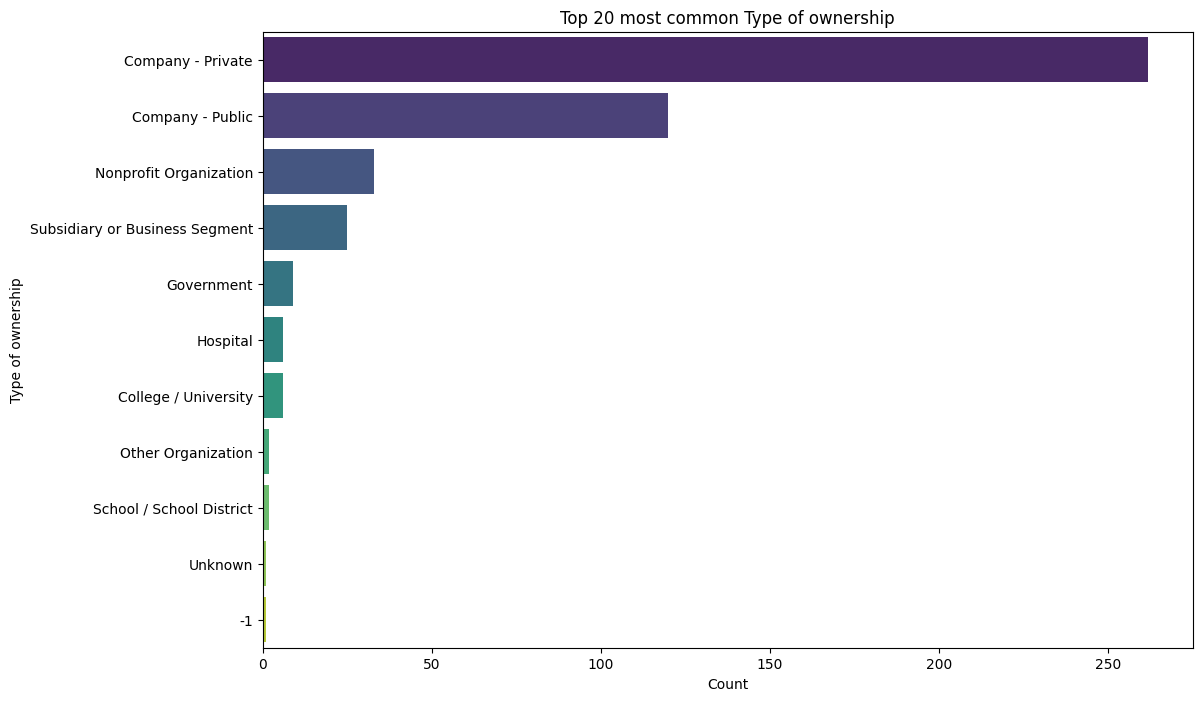

c:\Users\daine\Downloads\Proyecto\ETL_EDA\utils.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_n.index, x=top_n.values, palette='viridis')
c:\Users\daine\Downloads\Proyecto\ETL_EDA\utils.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(top_n.index, rotation=0, ha='right')


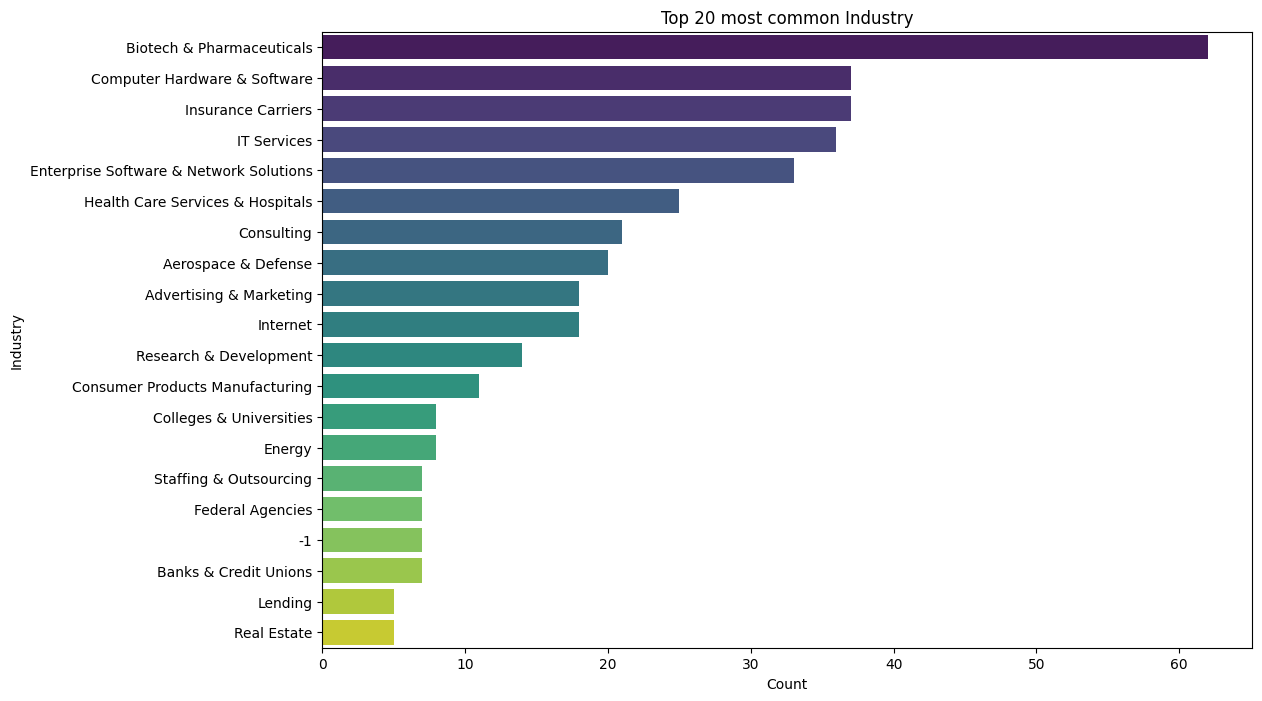

c:\Users\daine\Downloads\Proyecto\ETL_EDA\utils.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_n.index, x=top_n.values, palette='viridis')
c:\Users\daine\Downloads\Proyecto\ETL_EDA\utils.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(top_n.index, rotation=0, ha='right')


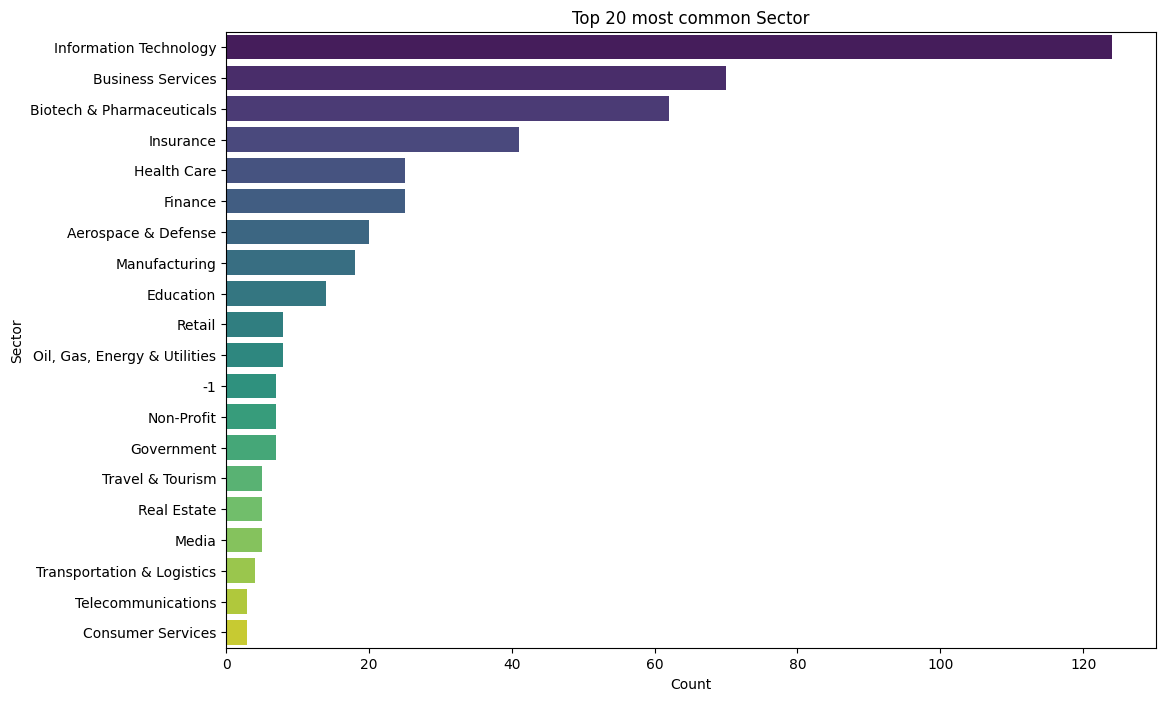

In [37]:
#Revisamos las variables categoricas
categorical_columns = ['Job Title', 'Location', 'Type of ownership', 'Industry', 'Sector']
for col in categorical_columns:
    plot_top_n_categories(df3, col, n=20)

In [38]:
#Agrupamos los titulos de empleo
df3['job_simp'] = df3['Job Title'].apply(title_simplifier)
df3.job_simp.value_counts()

job_simp
data scientist                                                       192
data engineer                                                         75
data analyst                                                          71
manager                                                               12
machine learning engineer                                             11
                                                                    ... 
r&d specialist/ food scientist                                         1
medical laboratory scientist                                           1
principal scientist, hematology                                        1
scientist/senior scientist, autoimmune                                 1
associate scientist / sr. associate scientist, antibody discovery      1
Name: count, Length: 98, dtype: int64

In [39]:
#Limpiamos la columna de compañia
df3['Company Name'] = df3['Company Name'].str.split('\n').str[0]

In [40]:
df3.head(5)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,Revenue,Competitors,hourly,employer_provided,job_state,same_state,min_salary,max_salary,avg_salary,job_simp
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,$50 to $100 million (USD),-1,0,0,NM,0,53000,91000,72000.0,data scientist
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,$2 to $5 billion (USD),-1,0,0,MD,0,63000,112000,87500.0,data scientist
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,$100 to $500 million (USD),-1,0,0,FL,1,80000,90000,85000.0,data scientist
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",0,0,WA,1,56000,97000,76500.0,data scientist
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0,0,NY,1,86000,143000,114500.0,data scientist


In [41]:
#Obtenemos informacion desde la descripcion del empleo
# Aplicar la función al DataFrame
df3['key_info'] = df3['Job Description'].apply(extract_key_info)

# Descomponer la columna de información clave en columnas separadas
df3['skills'] = df3['key_info'].apply(lambda x: x['skills'])
df3['responsibilities'] = df3['key_info'].apply(lambda x: x['responsibilities'])
df3['requirements'] = df3['key_info'].apply(lambda x: x['requirements'])

# Eliminar la columna temporal
df3= df3.drop(columns=['key_info'])

# Aplicar la limpieza a la columna de skills
df3['cleaned_skills'] = df3['skills'].apply(clean_skills)

In [42]:
df3.head(5)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,job_state,same_state,min_salary,max_salary,avg_salary,job_simp,skills,responsibilities,requirements,cleaned_skills
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,NM,0,53000,91000,72000.0,data scientist,"[Skills Required:, Bachelor’s Degree in releva...",[Responsibilities: The applicant will be respo...,[Education Required: Bachelor’s degree require...,
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,MD,0,63000,112000,87500.0,data scientist,[• Expert ability to breakdown and clearly def...,"[II. Principal Responsibilities and Tasks, • D...",[],
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,FL,1,80000,90000,85000.0,data scientist,[],"[Responsibilities:, Work with key stakeholders...",[],
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,WA,1,56000,97000,76500.0,data scientist,[],[],[],
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,NY,1,86000,143000,114500.0,data scientist,[],"[Duties and Responsibilities, · Support all cl...",[],


In [43]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 467 entries, 0 to 735
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          467 non-null    object 
 1   Salary Estimate    467 non-null    object 
 2   Job Description    467 non-null    object 
 3   Rating             467 non-null    float64
 4   Company Name       467 non-null    object 
 5   Location           467 non-null    object 
 6   Headquarters       467 non-null    object 
 7   Size               467 non-null    object 
 8   Founded            467 non-null    int64  
 9   Type of ownership  467 non-null    object 
 10  Industry           467 non-null    object 
 11  Sector             467 non-null    object 
 12  Revenue            467 non-null    object 
 13  Competitors        467 non-null    object 
 14  hourly             467 non-null    int64  
 15  employer_provided  467 non-null    int64  
 16  job_state          467 non-null

In [44]:
df3.cleaned_skills.value_counts()

cleaned_skills
               428
statistical     39
Name: count, dtype: int64

# **Dataset 4: Cleaned Dataset Canada**

In [45]:
#Carga del dataset
df4 = pd.read_csv(r'datasets\Cleaned_Dataset_Canada.csv')


In [46]:
#revision del dataset
print(df4.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1796 entries, 0 to 1795
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Job Title      1796 non-null   object 
 1   Job Info       1796 non-null   object 
 2   Position       1796 non-null   object 
 3   Employer       1796 non-null   object 
 4   City           1796 non-null   object 
 5   Province       1796 non-null   object 
 6   Skill          1796 non-null   object 
 7   Seniority      1796 non-null   object 
 8   Work Type      1796 non-null   object 
 9   Industry Type  1796 non-null   object 
 10  Min_Salary     1796 non-null   float64
 11  Max_Salary     1796 non-null   float64
 12  Avg_Salary     1796 non-null   float64
dtypes: float64(3), object(10)
memory usage: 182.5+ KB
None


In [47]:
print(df4.describe())

          Min_Salary     Max_Salary    Avg_Salary
count    1796.000000    1796.000000    1796.00000
mean    68664.196687   88205.254972   78434.72583
std     18792.564520   20038.391957   18026.98823
min     30240.560000   57200.000000   43720.28000
25%     60000.000000   79040.000000   69500.00000
50%     68000.000000   87000.000000   77750.00000
75%     79839.635000   93600.000000   87770.80000
max    137280.000000  180000.000000  158640.00000


In [48]:
df4.head(10)

,Job Title,Job Info,Position,Employer,City,Province,Skill,Seniority,Work Type,Industry Type,Min_Salary,Max_Salary,Avg_Salary
0,Systems and Data Analysts,Binance Accelerator Program - Data Analyst (Risk),Risk Analyst,Binance,Remote,Undef,"Python, Sql",ANY,Remote,Others,76000.00,89440.0,82720.000
1,Business and Marketing Analysts,Business Analyst,Business Analyst,Canadian Nuclear Laboratories,Remote,Undef,"Power Bi, Power BI, Excel",ANY,Remote,Others,65000.00,87000.0,76000.000
2,Business and Technical Analysts,Geophysicist/Data Analyst,Data Analyst,Sander Geophysics Limited,Ottawa,ON,Undef,ANY,In-Person,Technology,64123.59,86600.0,75361.795
3,Systems and Data Analysts,Business Intelligence Data Engineer,Data Engineer,"Maximus Services, LLC",Toronto,ON,"Fabric, Power BI, Sql, Machine Learning, Genes...",ANY,In-Person,Service,87875.00,105000.0,96437.500
4,Systems and Data Analysts,"BUSINESS INTELLIGENCE SPECIALIST, FT",Data Specialist,Niagara Health System,Niagara,ON,"Azure, Power BI, SQL, Aws",Senior,In-Person,Healthcare,115211.20,130332.8,122772.000
5,Senior Supply Chain Data Analysts,Continuous Improvement Analyst,Analyst,IMP Group,Abbotsford,BC,Excel,ANY,In-Person,Others,68500.00,87000.0,77750.000
6,Senior Business Intelligence Analysts,IT Business Process Analyst,Analyst,Ground Effects,Windsor,ON,"C#, Javascript, Sql, Database",ANY,In-Person,Others,68000.00,88300.0,78150.000
7,Systems and Data Analysts,Computer Programmer/Analyst,Programmer,The City of Vancouver,Vancouver,BC,"Database, Sql, Power Platform, Ssis, Azure, Ss...",ANY,In-Person,Technology,91145.60,107702.4,99424.000
8,Senior Business Intelligence Analysts,"Senior Developer, Business Intelligence",Developer,Ontario Health,Toronto,ON,"Power Bi, Power Platform, Ssis, Sql, Big Data,...",Senior,In-Person,Healthcare,68000.00,88300.0,78150.000
9,Senior Supply Chain Data Analysts,OPGT MOD Ã¢â‚¬â€œ ONE (1) BUSINESS ANALYST Ã¢â...,Business Analyst,Softline Technology,Toronto,ON,"Sql, Gap, Power BI",Senior,In-Person,Technology,68500.00,87000.0,77750.000


In [49]:
df4['country']='Canada'

# **Dataset 5: Cost of living US**

In [50]:
#Carga del dataset
df5 = pd.read_csv(r'datasets\cost_of_living_us.csv')
#descargarlo desde https://www.kaggle.com/datasets/asaniczka/us-cost-of-living-dataset-3171-counties?resource=download

In [51]:
#revision del dataset
print(df5.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31430 entries, 0 to 31429
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   case_id                 31430 non-null  int64  
 1   state                   31430 non-null  object 
 2   isMetro                 31430 non-null  bool   
 3   areaname                31430 non-null  object 
 4   county                  31430 non-null  object 
 5   family_member_count     31430 non-null  object 
 6   housing_cost            31430 non-null  float64
 7   food_cost               31430 non-null  float64
 8   transportation_cost     31430 non-null  float64
 9   healthcare_cost         31430 non-null  float64
 10  other_necessities_cost  31430 non-null  float64
 11  childcare_cost          31430 non-null  float64
 12  taxes                   31430 non-null  float64
 13  total_cost              31430 non-null  float64
 14  median_family_income    31420 non-null

In [52]:
df5.head(5)

,case_id,state,isMetro,areaname,county,family_member_count,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income
0,1,AL,True,"Montgomery, AL MSA",Autauga County,1p0c,8505.72876,3454.91712,10829.16876,5737.47984,4333.81344,0.0000,6392.94504,39254.0532,73010.414062
1,1,AL,True,"Montgomery, AL MSA",Autauga County,1p1c,12067.50240,5091.70788,11588.19288,8659.55640,6217.45896,6147.8298,7422.07836,57194.3256,73010.414062
2,1,AL,True,"Montgomery, AL MSA",Autauga County,1p2c,12067.50240,7460.20308,12361.77720,11581.63260,7075.65816,15824.6940,9769.56228,76141.0308,73010.414062
3,1,AL,True,"Montgomery, AL MSA",Autauga County,1p3c,15257.15040,9952.23924,13452.18600,14503.70760,9134.35620,18802.1892,13101.70320,94203.5328,73010.414062
4,1,AL,True,"Montgomery, AL MSA",Autauga County,1p4c,15257.15040,12182.21400,13744.59840,17425.78560,9942.36396,18802.1892,13469.21880,100823.5200,73010.414062
